In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Загрузка данных
df = pd.read_csv("pokemon.csv")
# Смотрю какие есть столбцы
print(df.columns)
# Просмотр общей информации о данных
print(df.info())
# Просмотр статистик по числовым столбцам
print(df.describe())
# Проверка на пропущенные значения
print(df.isnull().sum())
# Заполнение пропущенных значений (если необходимо)
df.fillna(0, inplace=True)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-nu

Самые-самые покемоны по характеристикам:
                   name   hp  attack  defense  sp_attack  sp_defense  speed  \
HP             Blissey  255      10       10         75         135     55   
Attack       Heracross   80     185      115         40         105     75   
Defense        Steelix   75     125      230         55          95     30   
Sp. Attack      Mewtwo  106     150       70        194         120    140   
Sp. Defense    Shuckle   20      10      230         10         230      5   
Speed           Deoxys   50      95       90         95          90    180   
Weight         Cosmoem   43      29      131         29         131     37   

             weight_kg    type1     type2  generation  is_legendary  
HP                46.8   normal         0           2             0  
Attack            54.0      bug  fighting           2             0  
Defense          400.0    steel    ground           2             0  
Sp. Attack       122.0  psychic         0           1

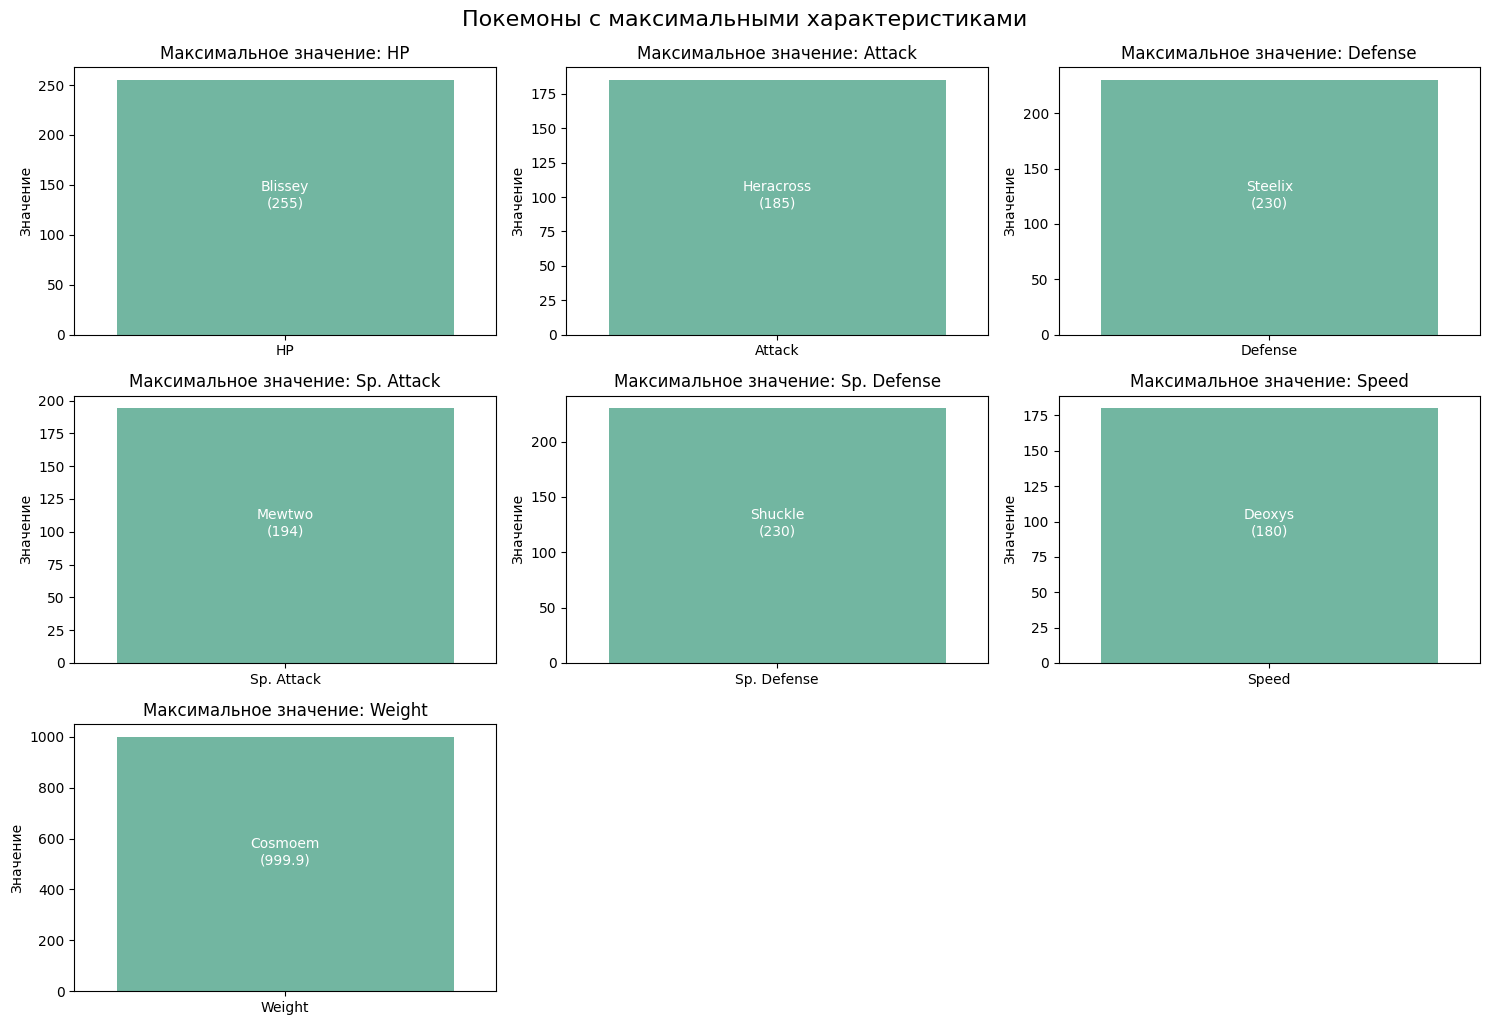

In [134]:
# Расчет суммы базовых характеристик (BST - Base Stat Total)
df["BST"] = df["hp"] + df["attack"] + df["defense"] + df["sp_attack"] + df["sp_defense"] + df["speed"]

# Создаем словарь с максимальными значениями характеристик
max_stats = {
    "HP": df.loc[df["hp"].idxmax()],
    "Attack": df.loc[df["attack"].idxmax()],
    "Defense": df.loc[df["defense"].idxmax()],
    "Sp. Attack": df.loc[df["sp_attack"].idxmax()],
    "Sp. Defense": df.loc[df["sp_defense"].idxmax()],
    "Speed": df.loc[df["speed"].idxmax()],
    "Weight": df.loc[df["weight_kg"].idxmax()],
}

# Преобразуем словарь в DataFrame
max_stats_df = pd.DataFrame.from_dict(max_stats, orient="index")[
    ["name", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "weight_kg", "type1", "type2", "generation", "is_legendary"]
]
print("Самые-самые покемоны по характеристикам:\n", max_stats_df)

# Визуализация
plt.figure(figsize=(15, 10))
for i, (stat, row) in enumerate(max_stats.items()):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=[stat], y=[row[stat.lower().replace(". ", "_").replace("weight", "weight_kg")]], hue=[stat], palette="Set2", legend=False)
    plt.title(f"Максимальное значение: {stat}")
    plt.ylabel("Значение")
    plt.xlabel("")
    plt.text(0, row[stat.lower().replace(". ", "_").replace("weight", "weight_kg")] / 2, f"{row['name']}\n({row[stat.lower().replace('. ', '_').replace('weight', 'weight_kg')]})", ha="center", color="white", fontsize=10)
plt.tight_layout()
plt.suptitle("Покемоны с максимальными характеристиками", y=1.02, fontsize=16)
plt.show()

**Выводы:**
- Покемоны с наибольшими характеристиками варьируются по типам и поколениям, но среди них часто встречаются легендарные покемоны, такие как Mewtwo и Deoxys.
- Блессей (Blissey) имеет максимальный показатель HP, но её атака и защита оставляют желать лучшего.
- Среди самых сильных по атаке и защите выделяются такие покемоны, как Heracross и Steelix.
- Легендарные покемоны часто лидируют по Sp. Attack и скорости, например, Mewtwo и Deoxys.


Сильнейшие покемоны каждого поколения:
      pokedex_number       name  BST   hp  attack  defense  sp_attack  \
149             150     Mewtwo  780  106     150       70        194   
247             248  Tyranitar  700  100     164      150         95   
383             384   Rayquaza  780  105     180      100        180   
492             493     Arceus  720  120     120      120        120   
645             646     Kyurem  700  125     120       90        170   
717             718    Zygarde  708  216     100      121         91   
790             791   Solgaleo  680  137     137      107        113   

     sp_defense  speed    type1   type2  generation  is_legendary  
149         120    140  psychic       0           1             1  
247         120     71     rock    dark           2             0  
383         100    115   dragon  flying           3             1  
492         120    120   normal       0           4             1  
645         100     95   dragon     ice    

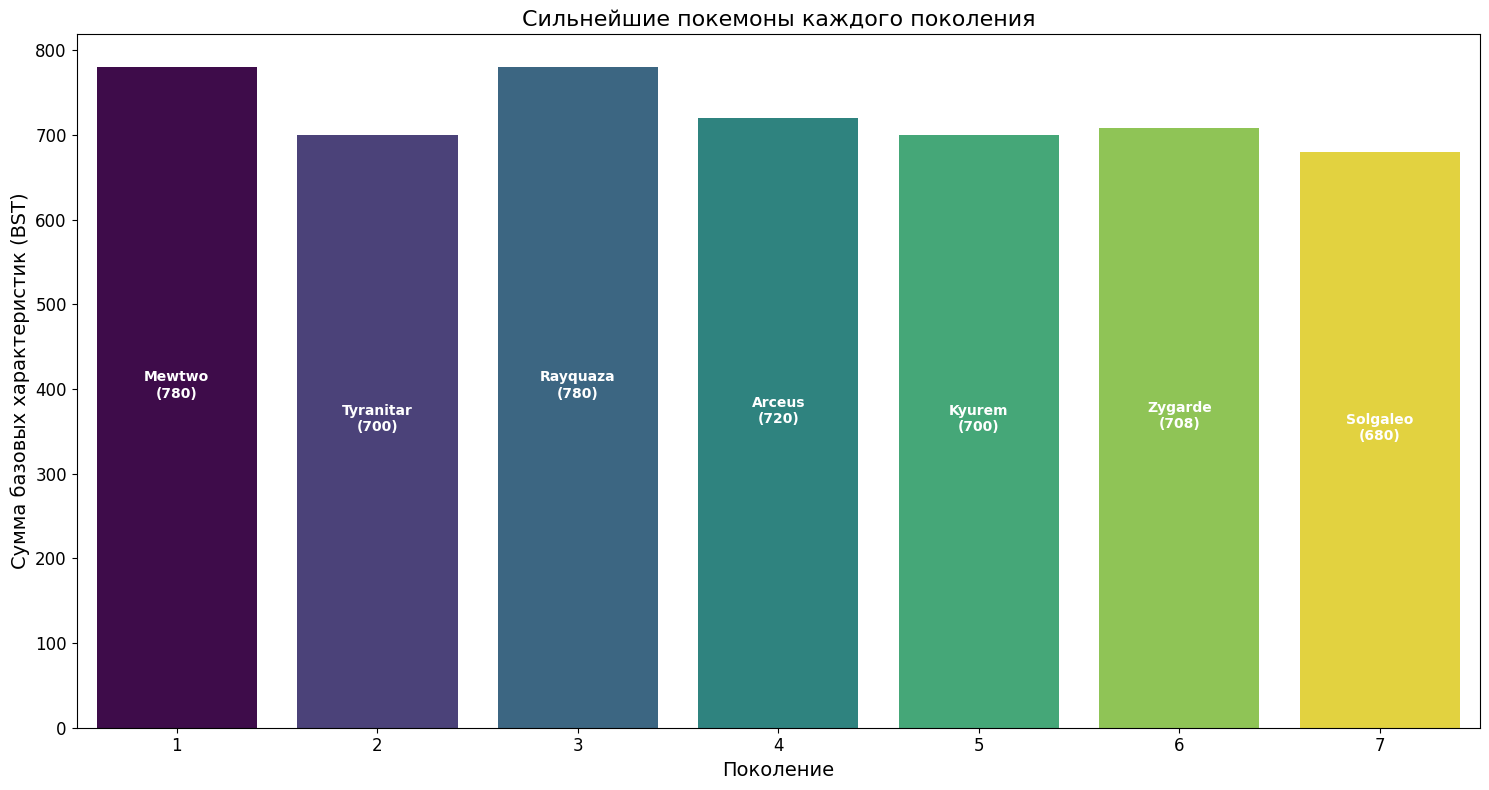

In [135]:
# ---2. Сильнейшие покемоны каждого поколения---
strongest_per_gen = df.loc[df.groupby("generation")["BST"].idxmax(),
                           ["pokedex_number", "name", "BST", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed",
                            "type1", "type2", "generation", "is_legendary"]]
print("Сильнейшие покемоны каждого поколения:\n", strongest_per_gen)

# Увеличиваем размер графика
plt.figure(figsize=(15, 8))  # Ширина: 15, высота: 8

# График сильнейших покемонов по поколениям
ax = sns.barplot(data=strongest_per_gen, x="generation", y="BST", hue="generation", palette="viridis", legend=False)
plt.title("Сильнейшие покемоны каждого поколения", fontsize=16)
plt.xlabel("Поколение", fontsize=14)
plt.ylabel("Сумма базовых характеристик (BST)", fontsize=14)
plt.xticks(fontsize=12)  # Размер шрифта для меток по оси X
plt.yticks(fontsize=12)  # Размер шрифта для меток по оси Y

# Добавляем имена покемонов на столбцы
for i, bar in enumerate(ax.patches):  # Перебираем все столбцы на графике
    height = bar.get_height()  # Высота столбца (значение BST)
    x = bar.get_x() + bar.get_width() / 2  # Центр столбца по оси X
    y = height / 2  # Позиция по оси Y (середина столбца)
    name = strongest_per_gen.iloc[i]["name"]  # Имя покемона
    bst = strongest_per_gen.iloc[i]["BST"]  # Значение BST
    ax.text(
        x,  # Позиция по оси X (центр столбца)
        y,  # Позиция по оси Y (середина столбца)
        f"{name}\n({bst})",  # Текст: имя и BST
        ha="center",  # Горизонтальное выравнивание по центру
        fontsize=10,  # Размер шрифта
        color="white",  # Цвет текста (белый для лучшей читаемости)
        weight="bold"  # Жирный шрифт
    )

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

**Выводы:**
- В каждом поколении лидируют покемоны с высокими значениями BST, при этом большинство из них — легендарные.
- Исключение составляют покемоны, как Tyranitar из 2-го поколения, который, несмотря на отсутствие легендарности, обладает высоким BST.
- У всех сильнейших покемонов — сбалансированные характеристики, что делает их универсальными для боя.


Средняя сила легендарных покемонов: 615.2571428571429
Средняя сила обычных покемонов: 410.4815321477428
Средняя сила по поколениям:
 is_legendary           0           1
generation                          
1             409.136986  624.000000
2             400.191489  616.666667
3             400.344000  666.000000
4             426.659574  628.461538
5             410.335664  610.769231
6             416.060606  674.666667
7             419.412698  554.705882
Средняя сила по типам:
 is_legendary           0           1
type1                               
bug           371.753623  580.000000
dark          430.500000  616.666667
dragon        458.350000  706.857143
electric      415.588235  576.000000
fairy         412.294118  680.000000
fighting      414.821429         NaN
fire          433.893617  608.000000
flying        390.000000  580.000000
ghost         425.269231  680.000000
grass         403.527027  580.000000
ground        408.833333  685.000000
ice           419.666667  580

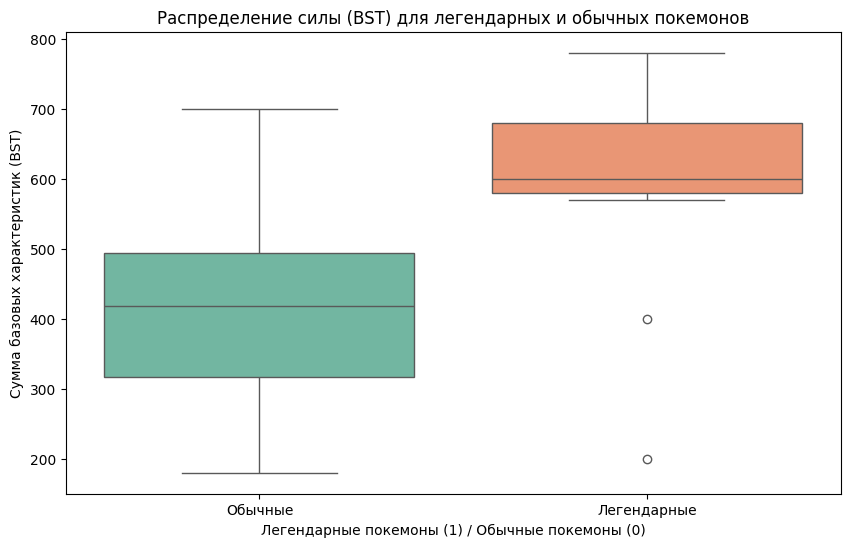

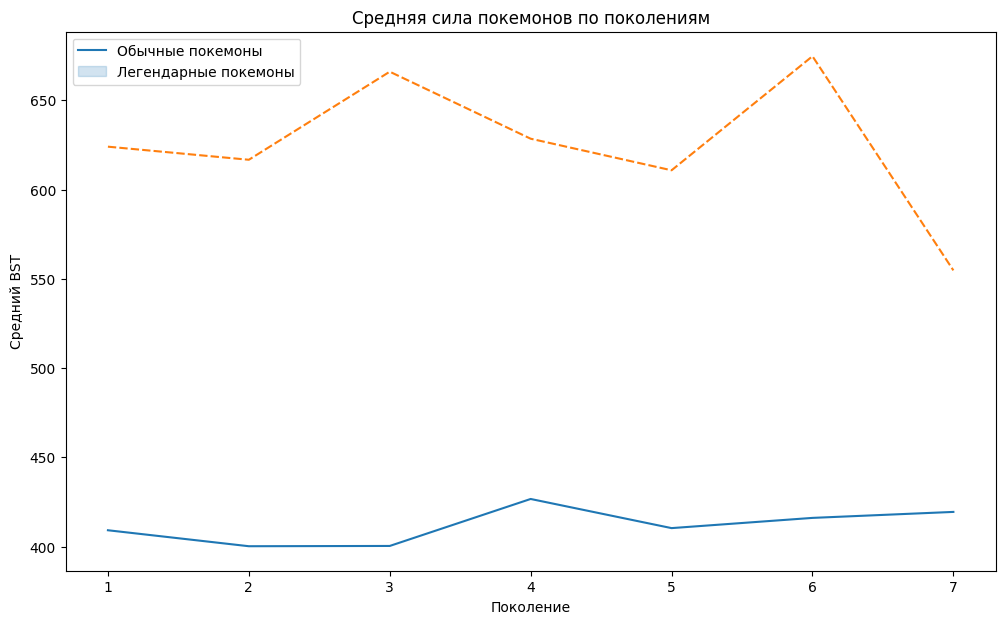

In [136]:
# ---3. Насколько легендарные покемоны сильнее---
legendary_stats = df[df["is_legendary"] == 1]["BST"].mean()
non_legendary_stats = df[df["is_legendary"] == 0]["BST"].mean()
print(f"Средняя сила легендарных покемонов: {legendary_stats}")
print(f"Средняя сила обычных покемонов: {non_legendary_stats}")

# Средние характеристики по поколениям
bst_by_generation = df.groupby(["generation", "is_legendary"])["BST"].mean().unstack()
print("Средняя сила по поколениям:\n", bst_by_generation)

# Средние характеристики по типам
bst_by_type = df.groupby(["type1", "is_legendary"])["BST"].mean().unstack()
print("Средняя сила по типам:\n", bst_by_type)

# График разницы силы между легендарными и обычными покемонами
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="is_legendary", y="BST", hue="is_legendary", palette="Set2", legend=False)
plt.title("Распределение силы (BST) для легендарных и обычных покемонов")
plt.xlabel("Легендарные покемоны (1) / Обычные покемоны (0)")
plt.ylabel("Сумма базовых характеристик (BST)")
plt.xticks([0, 1], ["Обычные", "Легендарные"])
plt.show()

# График средней силы по поколениям
plt.figure(figsize=(12, 7))
sns.lineplot(data=bst_by_generation)
plt.title("Средняя сила покемонов по поколениям")
plt.xlabel("Поколение")
plt.ylabel("Средний BST")
plt.legend(["Обычные покемоны", "Легендарные покемоны"])
plt.show()

**Выводы:**
- Легендарные покемоны имеют значительно более высокие средние показатели BST ~615 по сравнению с обычными покемонами ~410.
- Легендарные покемоны часто имеют сбалансированные характеристики и чаще всего обладают уникальными способностями и сильными атаками.
- В 3-м и 6-м поколениях легендарные покемоны показывают наибольшие значения BST.

Количество легендарных покемонов по типам:
 type1
psychic     17
dragon       7
water        6
steel        6
electric     5
fire         5
rock         4
grass        4
bug          3
normal       3
dark         3
ice          2
ground       2
ghost        1
flying       1
fairy        1
Name: count, dtype: int64


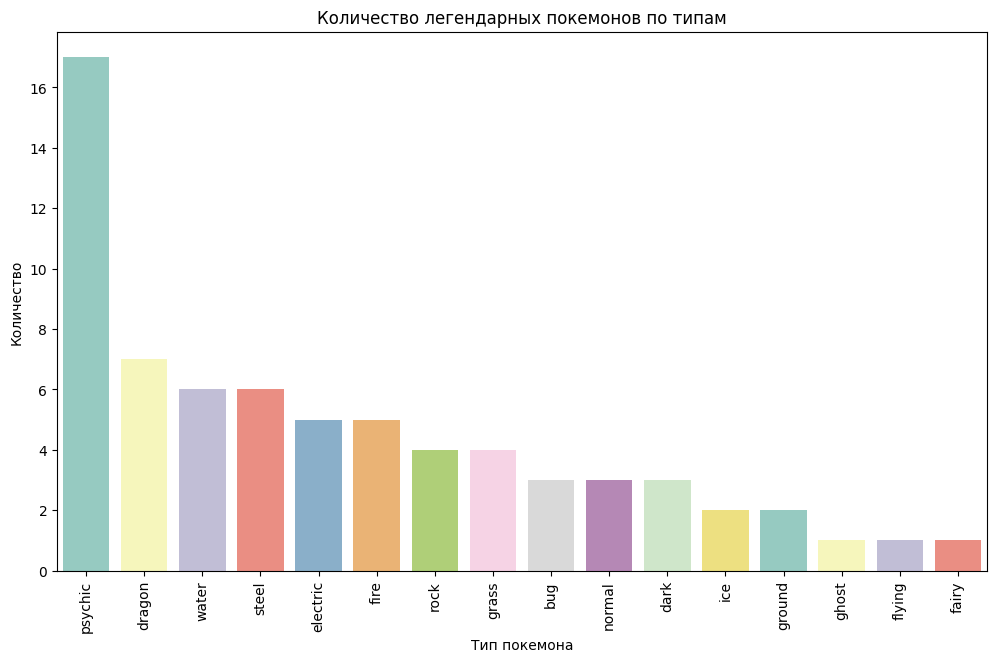

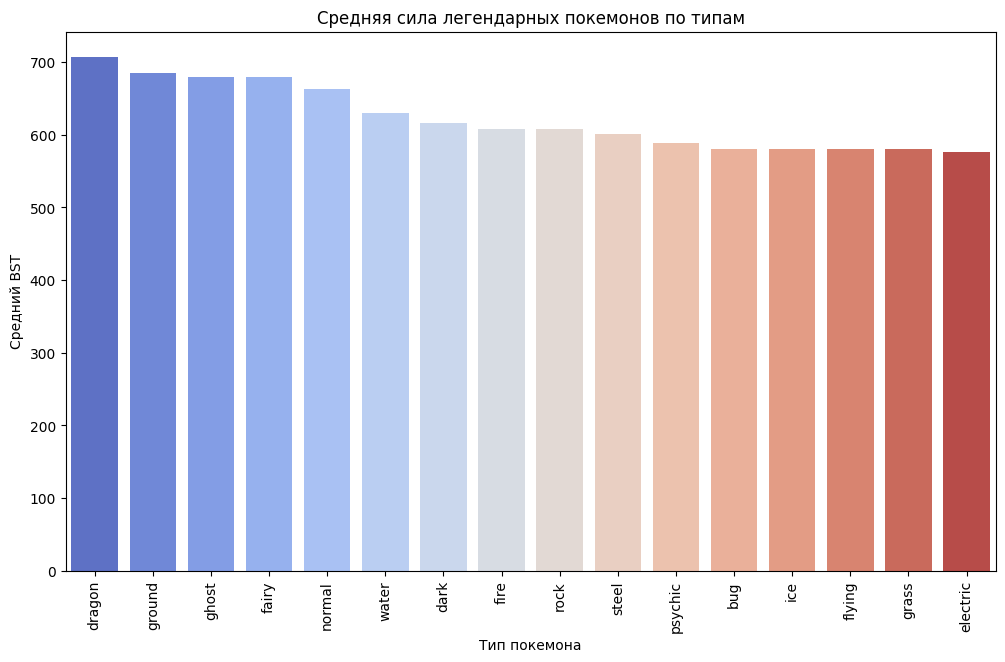

In [137]:
# ---4. Среди покемонов каких типов больше всего легендарных---
legendary_by_type = df[df["is_legendary"] == 1]["type1"].value_counts()
print("Количество легендарных покемонов по типам:\n", legendary_by_type)

# График количества легендарных покемонов по типам
plt.figure(figsize=(12, 7))
sns.barplot(x=legendary_by_type.index, y=legendary_by_type.values, hue=legendary_by_type.index, palette="Set3", legend=False)
plt.title("Количество легендарных покемонов по типам")
plt.xlabel("Тип покемона")
plt.ylabel("Количество")
plt.xticks(rotation=90)
plt.show()

# График средней силы по типам для легендарных покемонов
legendary_types = bst_by_type[1].dropna().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=legendary_types.index, y=legendary_types.values, hue=legendary_types.index, palette="coolwarm", legend=False)
plt.title("Средняя сила легендарных покемонов по типам")
plt.xlabel("Тип покемона")
plt.ylabel("Средний BST")
plt.xticks(rotation=90)
plt.show()

**Выводы:**
- Наибольшее количество легендарных покемонов встречается среди типов **Dragon**, **Psychic** и **Water**.
- Некоторые типы, такие как **Poison** и **Fighting**, не имеют легендарных покемонов.

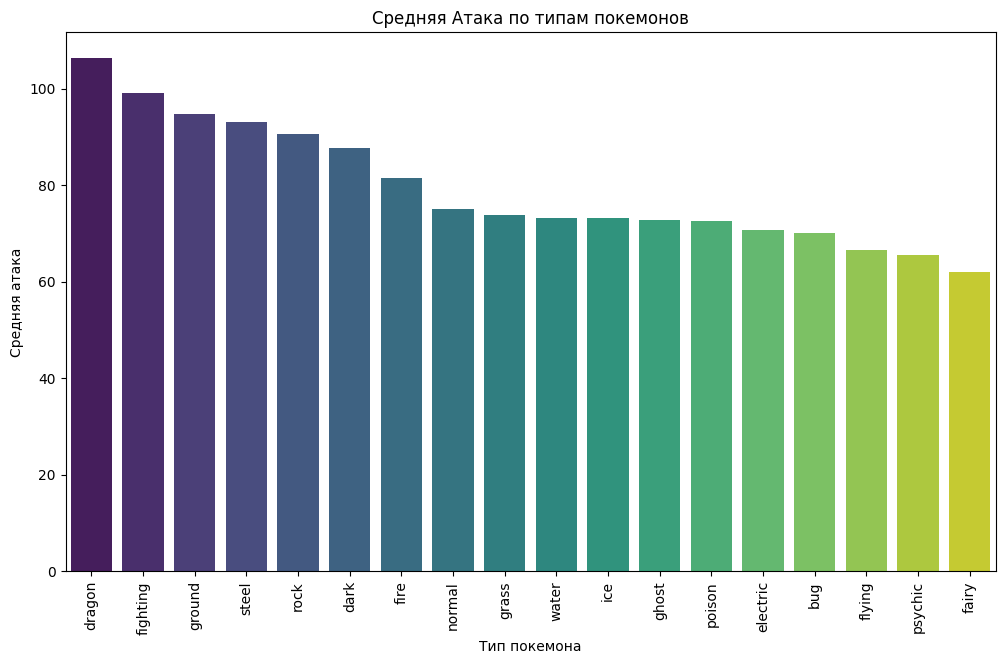

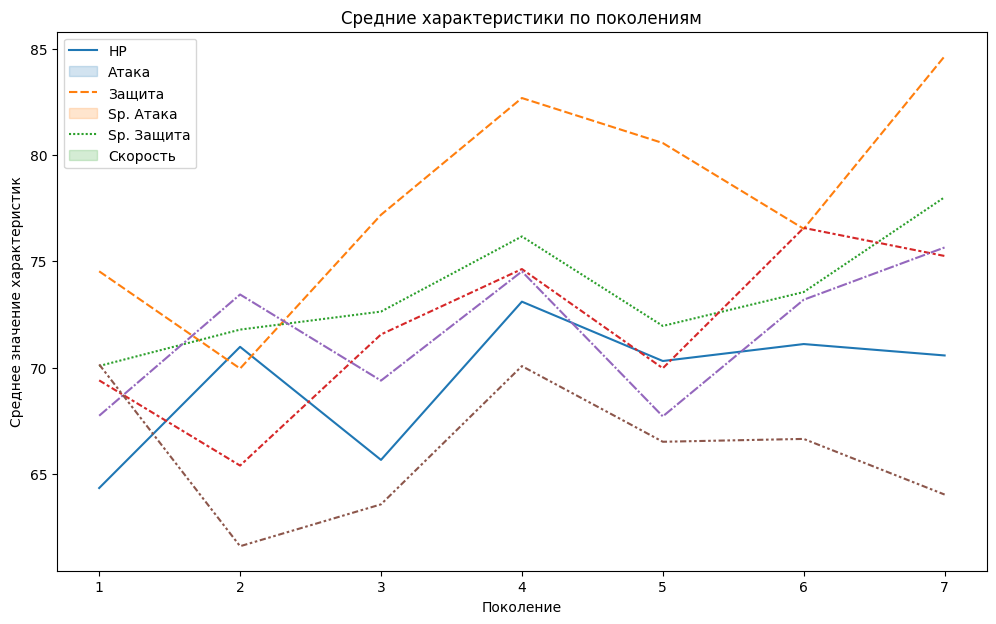

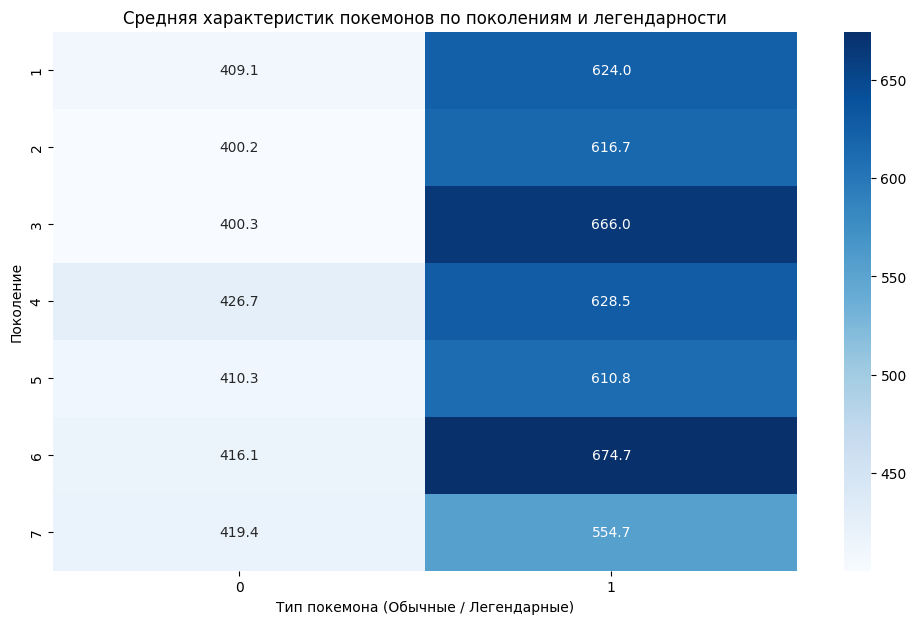

In [138]:
# ---5. Средние характеристики по типам и поколениям---

# Средние характеристики для покемонов по типам
avg_by_type = df.groupby("type1")[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean()
avg_by_type = avg_by_type.sort_values(by="attack", ascending=False)

# Средние характеристики для покемонов по поколениям
avg_by_gen = df.groupby("generation")[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean()

# Графики для средних характеристик по типам
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_by_type.index, y=avg_by_type["attack"], hue=avg_by_type.index, palette="viridis")
plt.title("Средняя Атака по типам покемонов")
plt.xlabel("Тип покемона")
plt.ylabel("Средняя атака")
plt.xticks(rotation=90)
plt.show()

# Графики для средних характеристик по поколениям
plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_by_gen)
plt.title("Средние характеристики по поколениям")
plt.xlabel("Поколение")
plt.ylabel("Среднее значение характеристик")
plt.legend(["HP", "Атака", "Защита", "Sp. Атака", "Sp. Защита", "Скорость"])
plt.show()

# Графики для средних характеристик по поколениям и легендарности
plt.figure(figsize=(12, 7))
sns.heatmap(bst_by_generation, annot=True, cmap="Blues", fmt=".1f")
plt.title("Средняя характеристик покемонов по поколениям и легендарности")
plt.ylabel("Поколение")
plt.xlabel("Тип покемона (Обычные / Легендарные)")
plt.show()


**Выводы по графику "Средняя Атака по типам покемонов":**
- Тепловая карта демонстрирует, что в целом **легендарные покемоны** имеют значительно более высокие значения BST, особенно в 3-м и 6-м поколениях.
- Средний показатель силы для обычных покемонов более стабильный, тогда как у легендарных он варьируется.


**Выводы "Средняя сила покемонов по поколениям и легендарности":**
- В 3-м поколении легендарные покемоны достигают максимума по мощности 666 BST.
- В 7-м поколении легендарные покемоны немного слабее, что может быть связано с изменениями в механике игры.
- Среднее значение BST для обычных покемонов остается стабильным, тогда как у легендарных наблюдается значительная вариативность.

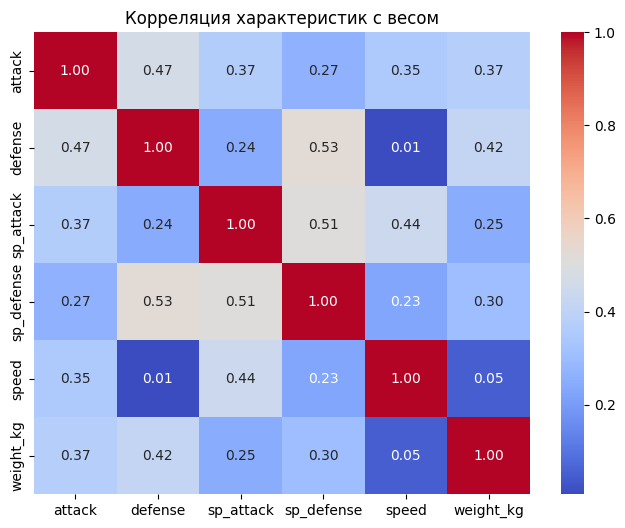

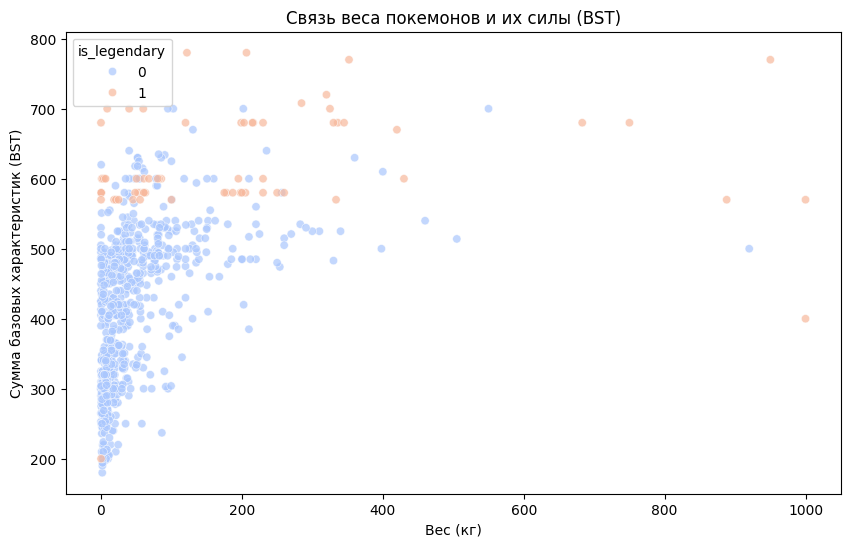

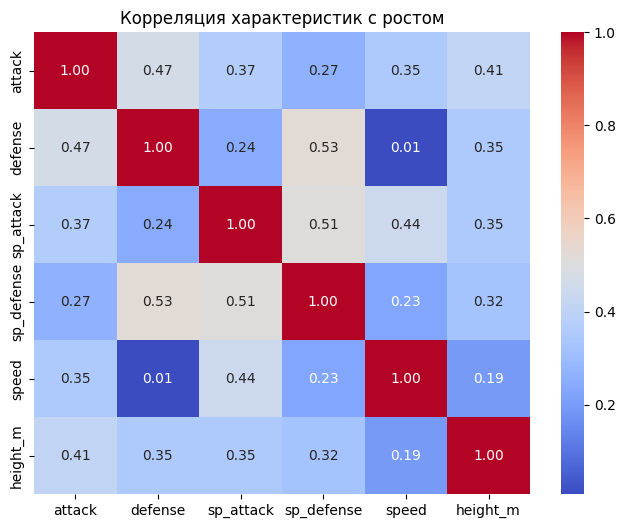

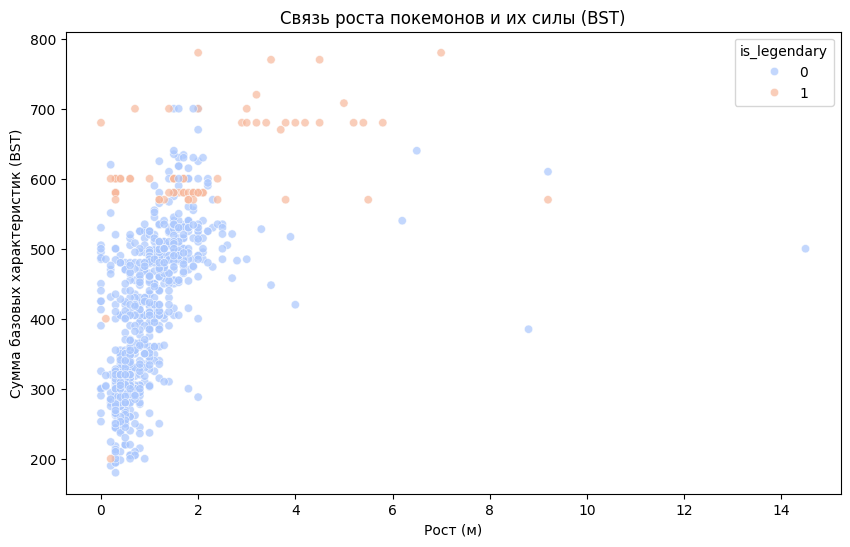

In [139]:
# --- 6. Связь характеристик с ростом и весом ---

# Корреляция между характеристиками и ростом/весом
correlation_with_weight = df[["attack", "defense", "sp_attack", "sp_defense", "speed", "weight_kg"]].corr()
correlation_with_height = df[["attack", "defense", "sp_attack", "sp_defense", "speed", "height_m"]].corr()

# Тепловая карта корреляции с весом
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_weight, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция характеристик с весом")
plt.show()

# График связи характеристик и веса покемонов
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="weight_kg", y="BST", hue="is_legendary", palette="coolwarm", alpha=0.7)
plt.title("Связь веса покемонов и их силы (BST)")
plt.xlabel("Вес (кг)")
plt.ylabel("Сумма базовых характеристик (BST)")
plt.show()
# Тепловая карта корреляции с ростом
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_height, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция характеристик с ростом")
plt.show()

#График связи характеристик и роста
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="height_m", y="BST", hue="is_legendary", palette="coolwarm", alpha=0.7)
plt.title("Связь роста покемонов и их силы (BST)")
plt.xlabel("Рост (м)")
plt.ylabel("Сумма базовых характеристик (BST)")
plt.show()

**Выводы по графику 6:**
- На графике видно, что рост покемонов не сильно коррелирует с их силой (BST), но среди высоких покемонов можно встретить как слабых, так и сильных.
- Легендарные покемоны чаще всего обладают высоким BST независимо от роста.


Важность характеристик для предсказания силы (BST):
       Feature  Coefficient  Absolute Coefficient
4  sp_defense          1.0                   1.0
3   sp_attack          1.0                   1.0
5       speed          1.0                   1.0
0          hp          1.0                   1.0
2     defense          1.0                   1.0
1      attack          1.0                   1.0


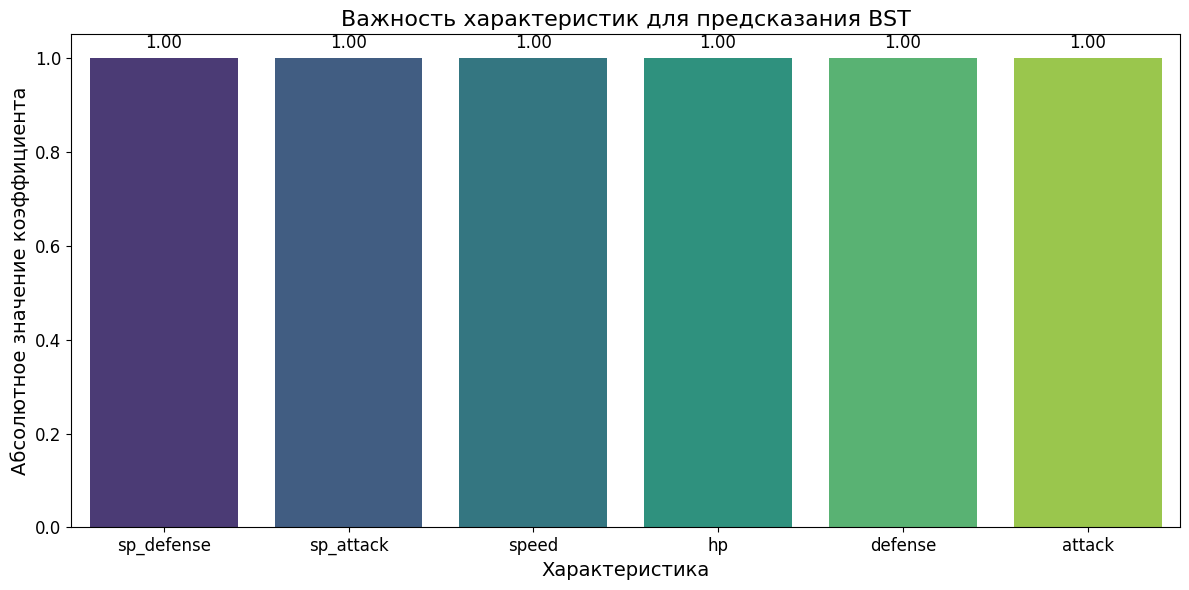

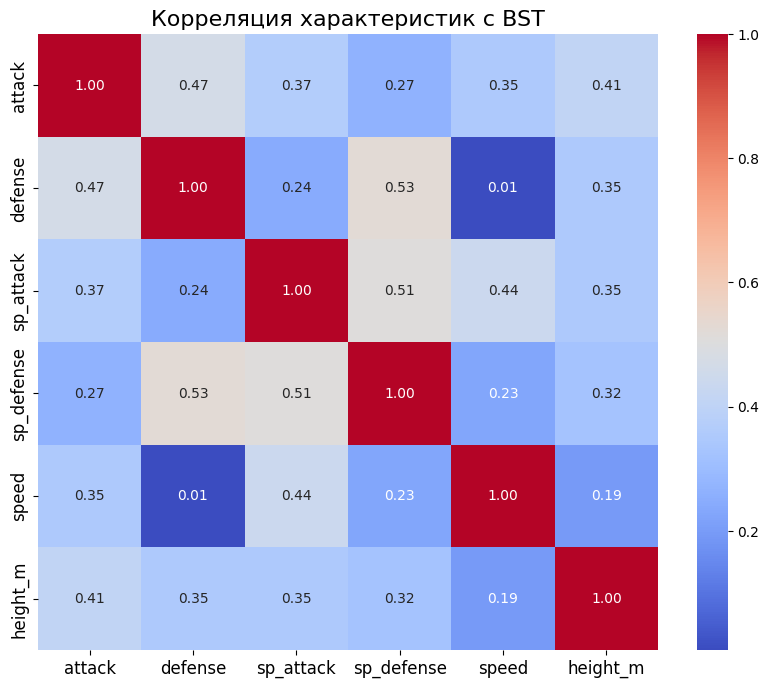

In [140]:
# --- 7. Важность характеристик для предсказания силы покемона ---

# Используем линейную регрессию для предсказания BST
features = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
X = df[features]
y = df["BST"]

# Линейная регрессия
model = LinearRegression()
model.fit(X, y)

# Важность признаков
importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

# Добавляем абсолютные значения коэффициентов для наглядности
importance["Absolute Coefficient"] = np.abs(importance["Coefficient"])

print("\nВажность характеристик для предсказания силы (BST):\n", importance)

# График важности характеристик
plt.figure(figsize=(12, 6))
sns.barplot(data=importance, x="Feature", y="Absolute Coefficient", hue="Feature", palette="viridis", legend=False)
plt.title("Важность характеристик для предсказания BST", fontsize=16)
plt.xlabel("Характеристика", fontsize=14)
plt.ylabel("Абсолютное значение коэффициента", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Добавляем значения коэффициентов на график
for i, row in importance.iterrows():
    plt.text(
        i,  # Позиция по оси X (индекс столбца)
        row["Absolute Coefficient"] + 0.02,  # Позиция по оси Y (немного выше столбца)
        f"{row['Coefficient']:.2f}",  # Значение коэффициента с округлением до 2 знаков
        ha="center",  # Горизонтальное выравнивание по центру
        fontsize=12,  # Размер шрифта
        color="black"  # Цвет текста
    )

plt.tight_layout()
plt.show()

# Корреляция между характеристиками и BST
correlation_with_bst = df[features + ["BST"]].corr()

# Тепловая карта корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_height, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция характеристик с BST", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Выводы по графику 7:**
- Визуально видно, что вес покемонов также не является идеальным предсказателем их силы.
- Однако среди тяжёлых покемонов можно встретить как очень сильных (например, легендарных), так и слабых.